In [415]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt


In [416]:
stx = pd.read_csv('data/prices.csv')
stx.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [417]:

stx.keys()

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [418]:
stx.describe

<bound method NDFrame.describe of                        date symbol        open       close         low  \
0       2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998   
1       2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002   
2       2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000   
3       2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000   
4       2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996   
...                     ...    ...         ...         ...         ...   
851259           2016-12-30    ZBH  103.309998  103.199997  102.849998   
851260           2016-12-30   ZION   43.070000   43.040001   42.689999   
851261           2016-12-30    ZTS   53.639999   53.529999   53.270000   
851262  2016-12-30 00:00:00    AIV   44.730000   45.450001   44.410000   
851263  2016-12-30 00:00:00    FTV   54.200001   53.630001   53.389999   

              high     volume  
0       126.250000  2163600.0  
1       125.5

In [434]:

def get_data(symbol, year):
    sybl = stx.loc[stx["symbol"] == symbol]
    sybl["year"] = pd.DatetimeIndex(sybl["date"]).year
    sybl["month"] = pd.DatetimeIndex(sybl["date"]).month
    sybl["month_two"] = pd.DatetimeIndex(sybl["date"]).month
    sybl["day"] = pd.DatetimeIndex(sybl["date"]).day
    sybl["diff"] = sybl["open"]-sybl["close"]
    sybl = sybl.loc[sybl["year"] == year]
    sybl_year = sybl[["month_two", "month", "open", "close", "diff"]].groupby(["month_two"]).mean()

    return sybl_year

get_data('AAPL', 2010)


,month,open,close,diff
year,,,,
2010,6.583333,259.957619,259.842460,0.115159
2011,6.547619,364.061428,364.004325,0.057102
2012,6.500000,576.652721,576.049720,0.603001
2013,6.543651,473.128136,472.634880,0.493255
2014,6.551587,295.142620,295.402342,-0.259722
2015,6.567460,120.175754,120.040000,0.135754
2016,6.555556,104.507778,104.604008,-0.096230


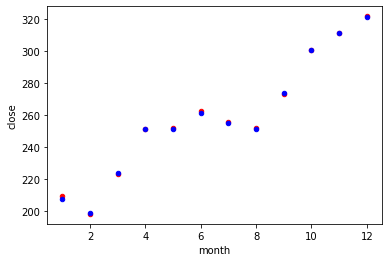

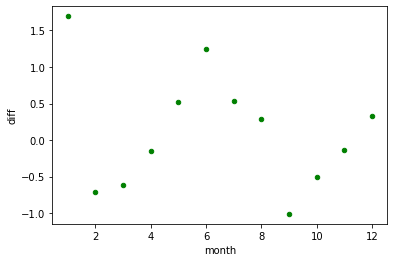

In [425]:
ax = plt.gca()
sybl_year.plot(kind='scatter',x='month',y='open',color='red', ax=ax)
sybl_year.plot(kind='scatter',x='month',y='close',color='blue', ax=ax)
sybl_year.plot(kind='scatter',x='month',y='diff',color='green')
plt.show()

In [429]:
x = sybl_year["month"].values.reshape((-1,1))
y = sybl_year["diff"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
y_train

array([ 1.24045673,  0.5180025 , -0.61391222,  1.69421   , -0.14142738,
        0.28727205, -0.14714319,  0.32545118, -1.00999967])

Text(0.5, 1.0, 'What is the predicted lossed and gains by month for the following year?')

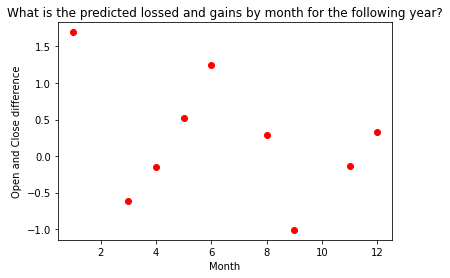

In [432]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Month')
plt.ylabel('Open and Close difference')
plt.title('What is the predicted lossed and gains by month for the following year?')

In [423]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.05473405679073673